In [80]:
!pip install kaggle


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [84]:
import os
import shutil

# Replace with the path to where your kaggle.json is downloaded
source = os.path.expanduser("~/Desktop/kaggle.json")
destination = os.path.expanduser("~/.kaggle/kaggle.json")

# Create the .kaggle directory if it doesn't exist
os.makedirs(os.path.dirname(destination), exist_ok=True)

# Move the file
shutil.move(source, destination)

# Set proper file permissions
os.chmod(destination, 0o600)

print("kaggle.json moved and permissions set successfully.")


kaggle.json moved and permissions set successfully.


In [88]:
!kaggle datasets download -d katerynameleshenko/ai-index

Dataset URL: https://www.kaggle.com/datasets/katerynameleshenko/ai-index
License(s): DbCL-1.0
ai-index.zip: Skipping, found more recently modified local copy (use --force to force download)


In [90]:
import zipfile

with zipfile.ZipFile("AI_index.zip","r") as zip_ref:
    zip_ref.extractall("AI")

FileNotFoundError: [Errno 2] No such file or directory: 'AI_index.zip'

In [ ]:
print(os.listdir("AI"))

In [ ]:
df = pd.read_csv("/kaggle/input/ai-index/AI_index_db.csv")
df.head(10)

In [15]:

df.columns

Index(['Country', 'Talent', 'Infrastructure', 'Operating Environment',
       'Research', 'Development', 'Government Strategy', 'Commercial',
       'Total score', 'Region', 'Cluster', 'Income group', 'Political regime'],
      dtype='object')

In [17]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                62 non-null     object 
 1   Talent                 62 non-null     float64
 2   Infrastructure         62 non-null     float64
 3   Operating Environment  62 non-null     float64
 4   Research               62 non-null     float64
 5   Development            62 non-null     float64
 6   Government Strategy    62 non-null     float64
 7   Commercial             62 non-null     float64
 8   Total score            62 non-null     float64
 9   Region                 62 non-null     object 
 10  Cluster                62 non-null     object 
 11  Income group           62 non-null     object 
 12  Political regime       62 non-null     object 
dtypes: float64(8), object(5)
memory usage: 6.4+ KB


In [19]:
df.describe()

,Talent,Infrastructure,Operating Environment,Research,Development,Government Strategy,Commercial,Total score
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,16.803065,63.503710,66.925484,16.610000,14.824677,57.865645,6.171935,23.914677
std,15.214963,20.217525,20.000424,17.413996,19.419279,26.252448,14.029632,15.123586
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.365000,55.857500,58.107500,3.032500,1.202500,41.030000,0.697500,14.805000
50%,13.445000,65.230000,69.505000,12.930000,9.005000,63.930000,2.585000,23.220000
75%,24.567500,75.947500,80.500000,25.412500,19.980000,77.952500,5.307500,30.487500
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [31]:

df.isnull().sum()

Country                  0
Talent                   0
Infrastructure           0
Operating Environment    0
Research                 0
Development              0
Government Strategy      0
Commercial               0
Total score              0
Region                   0
Cluster                  0
Income group             0
Political regime         0
dtype: int64

In [23]:
df.duplicated().sum()

0

In [25]:
df['Income group'].unique()

array(['High', 'Upper middle', 'Lower middle'], dtype=object)

In [27]:
df['Cluster'].unique()

array(['Power players', 'Traditional champions', 'Rising stars',
       'Waking up', 'Nascent'], dtype=object)

In [37]:
df['Region'].unique()

array(['Americas', 'Asia-Pacific', 'Europe', 'Middle East', 'Africa'],
      dtype=object)

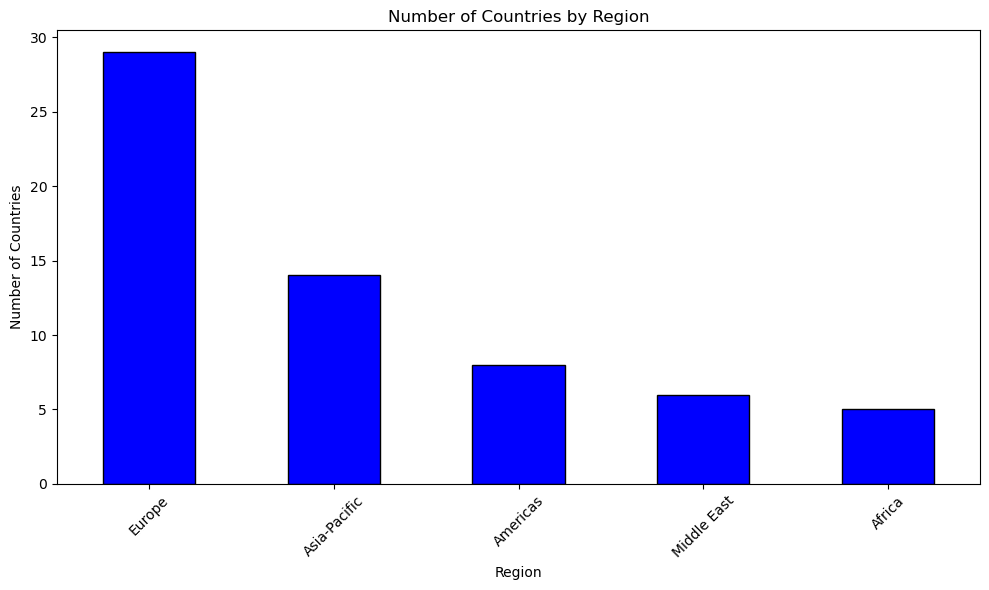

In [35]:
import matplotlib.pyplot as plt 
country_counts = df['Region'].value_counts()
plt.figure(figsize=(10, 6))
country_counts.plot(kind='bar', color='blue', edgecolor='black')
plt.title('Number of Countries by Region')
plt.xlabel('Region')
plt.ylabel('Number of Countries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



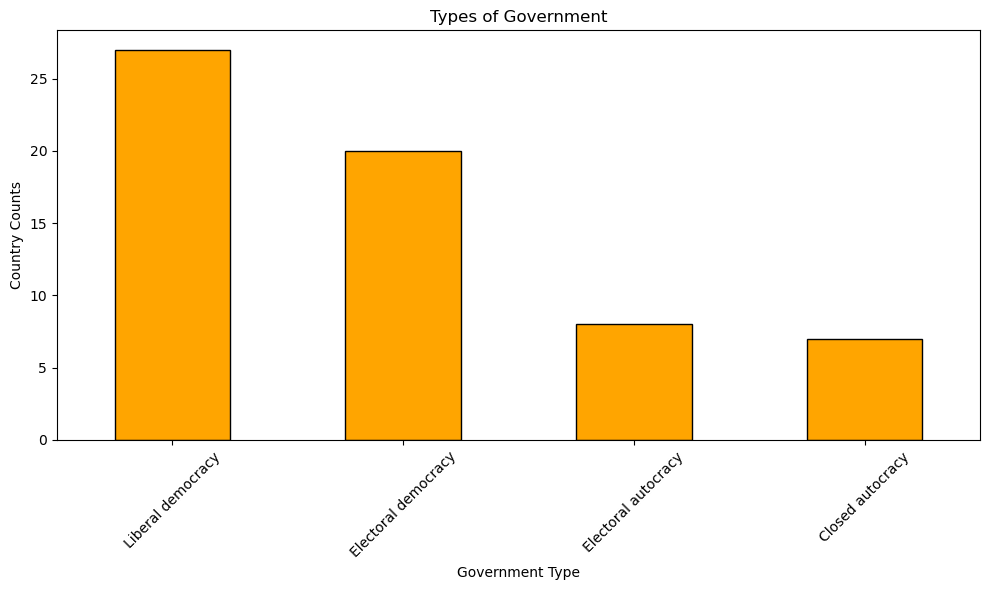

In [41]:

democracy_counts = df['Political regime'].value_counts()
plt.figure(figsize=(10, 6))
democracy_counts.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Types of Government')
plt.xlabel('Government Type')
plt.ylabel('Country Counts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [43]:
df_sorted = df.sort_values(by='Total score', ascending=True)
color_map = {
 "Americas": 'cyan',
 "Asia-Pacific": 'magenta',
 "Europe": 'lawngreen',
 "Middle East": 'gold',
 "Africa": 'orangered'
}

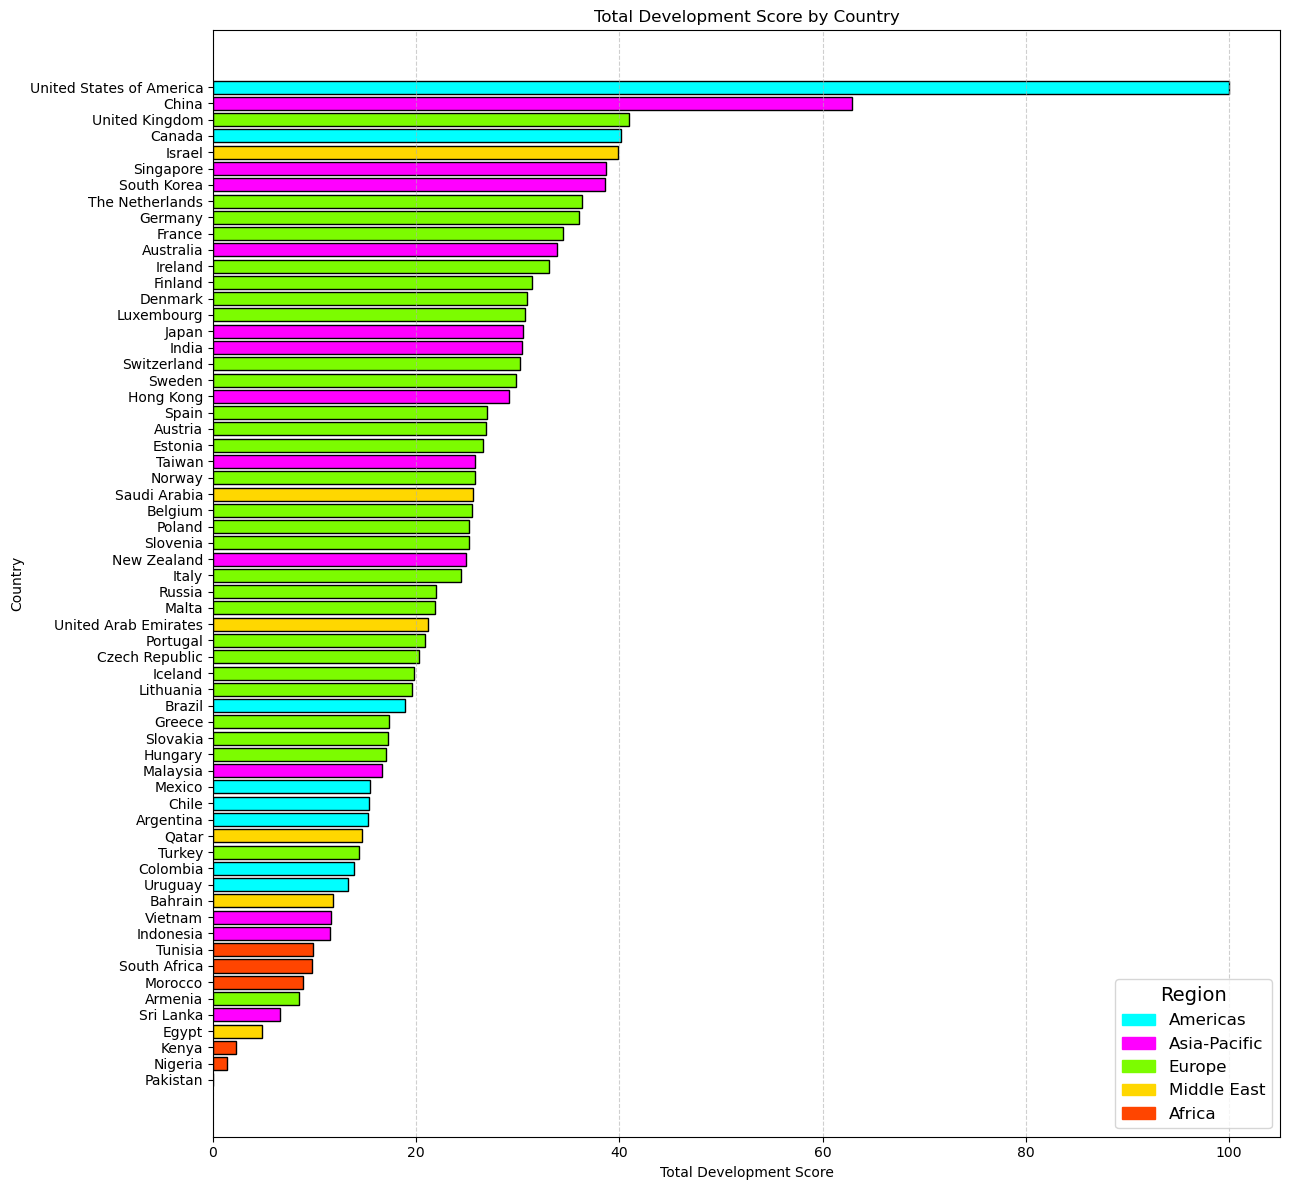

In [45]:
import matplotlib.patches as mpatches

colors = df_sorted['Region'].map(color_map)
plt.figure(figsize=(13, 12))
plt.barh(df_sorted['Country'], df_sorted['Total score'], color=colors, edgecolor='black')

legend_handles = [mpatches.Patch(color=color, label=region) for region, color in color_map.items()]
plt.legend(handles=legend_handles, title="Region", fontsize =12, title_fontsize = 14)

plt.title('Total Development Score by Country')
plt.xlabel('Total Development Score')
plt.ylabel('Country')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

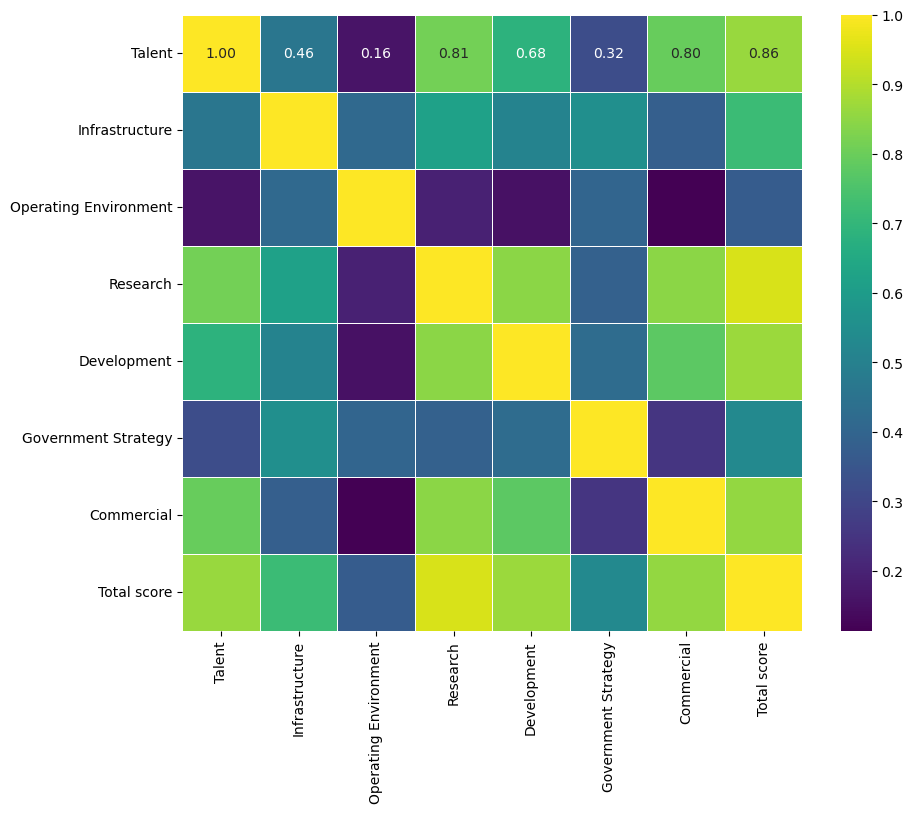

In [49]:
import seaborn as sns
numeric_df = df.select_dtypes(include=['number'])
numeric_df.describe()

correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', linewidths = 0.55, fmt=".2f")
plt.rcParams.update()
plt.show() 

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#Splits data into X and y
X = df[['Research']]
y = df['Total score']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=321)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
r_value = r2_score(y_test, y_pred)

#Print out the results - how effective was the model
print("Predictions:", y_pred)
print("R² Score (Accuracy):", r_value)

Predictions: [20.04386044 10.22244045 32.15200969 10.45275851 31.1813836  40.24604425
 25.26714493 15.1249248  31.37057343 12.30352861]
R² Score (Accuracy): 0.8297838126466026


In [53]:
print(df[['Research', 'Total score']].corr())


             Research  Total score
Research     1.000000     0.945877
Total score  0.945877     1.000000


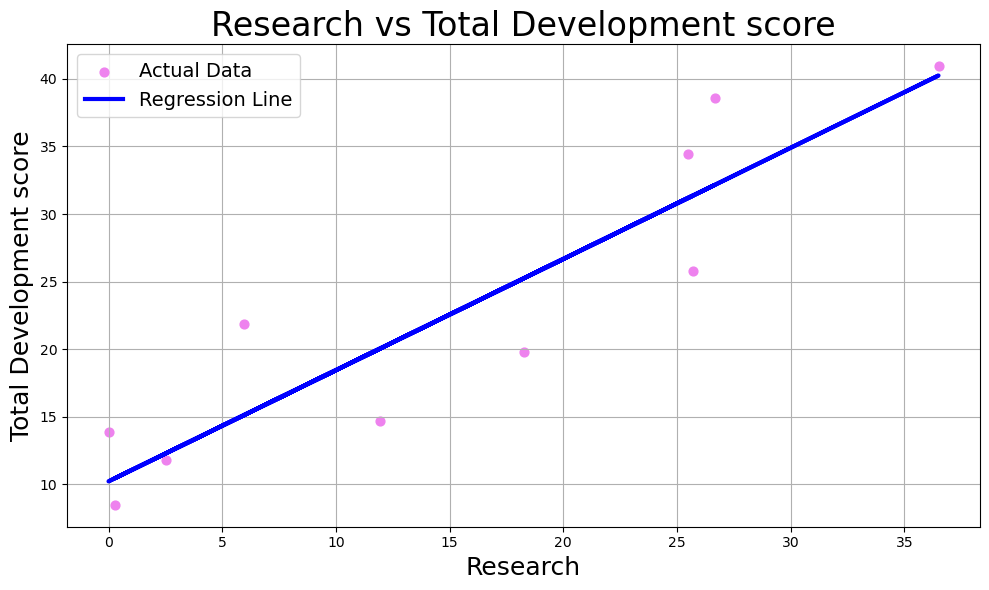

In [57]:

plt.figure(figsize=(10, 6), dpi=100)
plt.scatter(X_test, y_test, color='violet', s=40, label='Actual Data')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Regression Line')
plt.title("Research vs Total Development score", fontsize=24)
plt.xlabel("Research", fontsize=18)
plt.ylabel("Total Development score", fontsize=18)
plt.legend(fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

# I only used one variable (Research) to predict Total score.

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#Splits data into X and y
X = df[['Development']]
y = df['Total score']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=420)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
r_value = r2_score(y_test, y_pred)

#Print out the results - how effective was the model
print("Predictions:", y_pred)
print("R² Score (Accuracy):", r_value)

Predictions: [13.7602676  21.79583301 23.62741861 24.41926953 68.79046358 18.90385574
 34.97498655 20.13638891 19.66816402 31.47707119]
R² Score (Accuracy): 0.8220378571858455


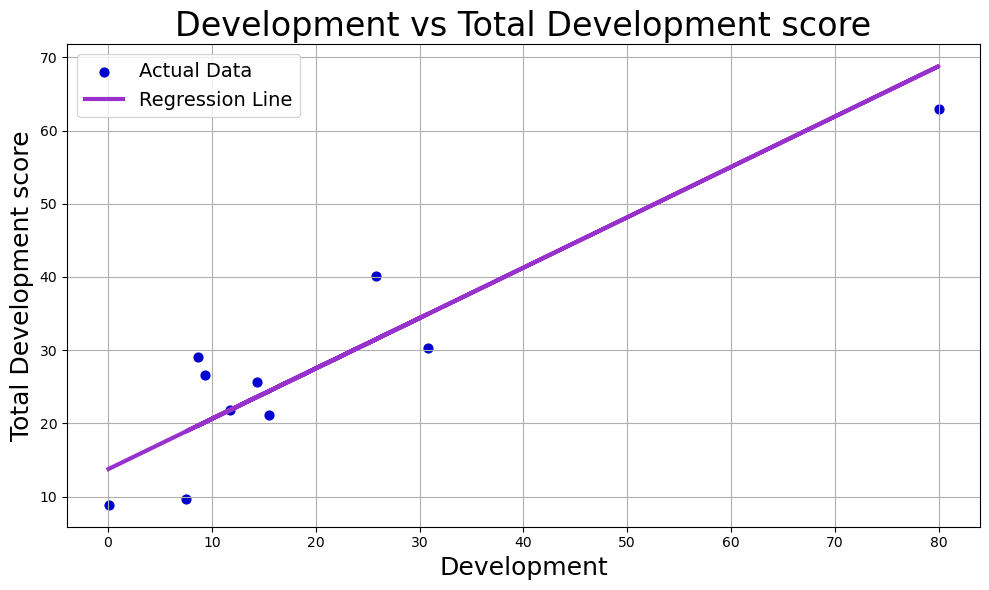

In [61]:
plt.figure(figsize=(10, 6), dpi=100)
plt.scatter(X_test, y_test, color='mediumblue', s=40, label='Actual Data')
plt.plot(X_test, y_pred, color='darkorchid', linewidth=3, label='Regression Line')
plt.title("Development vs Total Development score", fontsize=24)
plt.xlabel("Development", fontsize=18)
plt.ylabel("Total Development score", fontsize=18)
plt.legend(fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

In [69]:
from sklearn.metrics import mean_absolute_error
import numpy as np
X = numeric_df.drop(columns=['Total score']) 
y = numeric_df['Total score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred = np.clip(y_pred, 0, 100) 

print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))
# I used all numeric features except Total score.
# More features usually give the model more information, so R² can be higher — but it also depends on the relevance of those features.

MAE: 0.003184088241078793
R² Score: 0.9999999752683308


In [73]:
# Model comparison data
models = [
    {
        "Model": "Single Feature (Research)",
        "Features": "Research",
        "Test Size": "15%",
        "Random State": 321,
        "R² Score": 0.822  # Replace with your real value
    },
    {
        "Model": "Multiple Features",
        "Features": "All numeric except Total score",
        "Test Size": "20%",
        "Random State": 42,
        "R² Score":  0.999  # Replace with your real value
    }
]

import pandas as pd

# Create a DataFrame for the summary
summary_df = pd.DataFrame(models)

# Display the table
print(summary_df.to_string(index=False))


                    Model                       Features Test Size  Random State  R² Score
Single Feature (Research)                       Research       15%           321     0.822
        Multiple Features All numeric except Total score       20%            42     0.999
